In [1]:

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
from utils import show_images
import torchvision
import io
from utils import show_images
from diffusers import FluxImg2ImgPipeline
from diffusers.utils import load_image

In [ ]:
device = "cuda"
pipe = FluxImg2ImgPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe = pipe.to(device)
# recon_path = "/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/imagery/subj01_40sess_hypatia_ridge_sc3/subject1/"
# image_preds = torch.load(recon_path + "stable_cascade_image_voxels.pt")
# text_preds = torch.load(recon_path + "stable_cascade_text_voxels.pt")
# latent_preds = torch.load(recon_path + "stable_cascade_latent_voxels.pt")

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

(…)pytorch_model-00001-of-00003.safetensors:   8%|7         | 786M/9.98G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:  44%|####4     | 1.72G/3.87G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   8%|7         | 755M/9.95G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:  13%|#3        | 661M/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:  13%|#2        | 577M/4.53G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 80.00 MiB. GPU 0 has a total capacity of 39.38 GiB of which 23.38 MiB is free. Including non-PyTorch memory, this process has 39.35 GiB memory in use. Of the allocated memory 38.79 GiB is allocated by PyTorch, and 67.28 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
device = "cuda"
pipe = FluxImg2ImgPipeline.from_pretrained("XLabs-AI/flux-dev-fp8", torch_dtype=torch.bfloat16)
pipe = pipe.to(device)
# recon_path = "/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/imagery/subj01_40sess_hypatia_ridge_sc3/subject1/"
# image_preds = torch.load(recon_path + "stable_cascade_image_voxels.pt")
# text_preds = torch.load(recon_path + "stable_cascade_text_voxels.pt")
# latent_preds = torch.load(recon_path + "stable_cascade_latent_voxels.pt")

  0%|          | 0/4 [00:00<?, ?it/s]

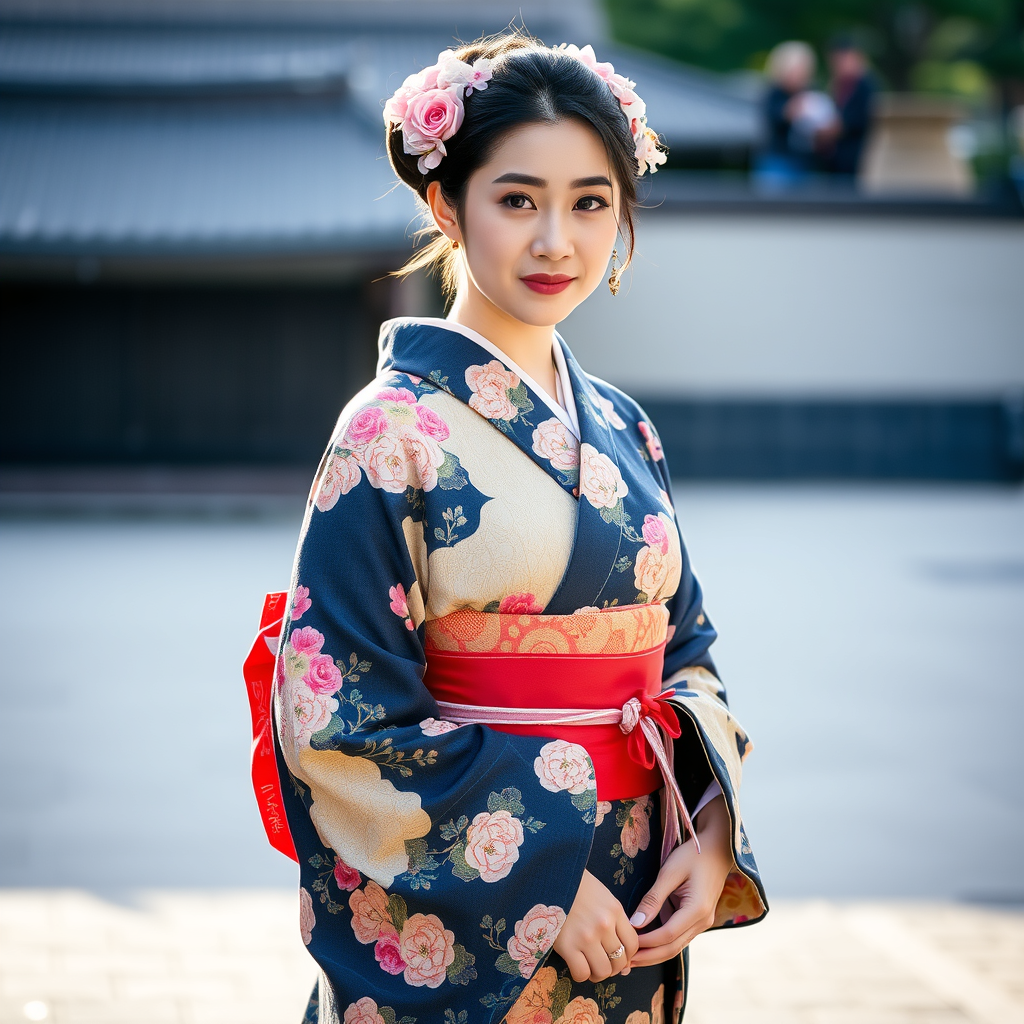

In [ ]:
# index = 6
# latent_embed = latent_preds[6:12]
# image_embed = image_preds[6:12]
# prompt_embed = text_preds[6:12]
# prompt = "a woman riding a horse"
# image = Image.open("/home/naxos2-raid25/kneel027/home/kneel027/IP-Adapter_MEI/assets/images/woman.png")
# prompt_embed = recon.embed_text(prompt)
# image_embed = recon.embed_image(image)
image = Image.open("/home/naxos2-raid25/kneel027/home/kneel027/IP-Adapter_MEI/assets/images/horse.jpg")
# latent_embed = recon.embed_latent(image)
# print(torch.mean(image_embed), torch.mean(prompt_embed), torch.sum(image_embed), torch.sum(prompt_embed))
# print(prompt_embed.shape, image_embed.shape, latent_embed.shape)
# url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
# init_image = load_image(url).resize((1024, 1024))

prompt = "a japanese woman wearing a kimono"

images = pipe(
    prompt=prompt, image=image, num_inference_steps=4, strength=0.8, guidance_scale=0.0
).images[0]
# show_images(sample)
images
